In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Modelo SARIMA

O modelo __SARIMA__ funciona analogamente ao modelo ARIMA, onde além dos parâmetros do ARIMA, iremos passar alguns parâmetros para a Sazonalidade:

https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

In [1]:
import statsmodels.api as sm

Iremos utilizar um dataset do _statsmodels_ sobre emissão de C02:

In [2]:
data = sm.datasets.co2.load_pandas()

In [4]:
y = data.data

In [5]:
y

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


<AxesSubplot:>

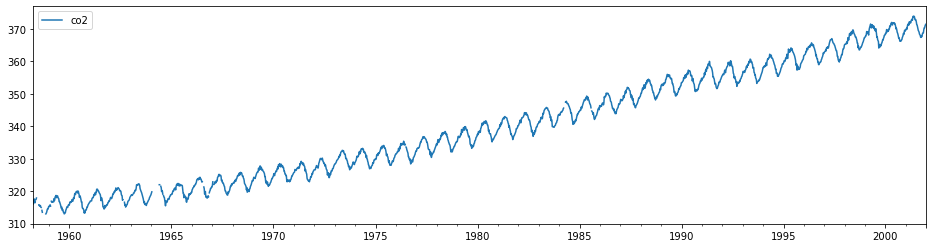

In [7]:
y.sort_index().plot(figsize=(16,4))

In [10]:
# resample mensal com dados médios de co2

y = y['co2'].resample('MS').mean()
y

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

In [14]:
# preenchendo dados faltantes. Preencher com os dados anteriores (um exemplo, pode preencher tirando a média)
y = y.fillna(y.ffill())

y

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    317.433333
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

<AxesSubplot:>

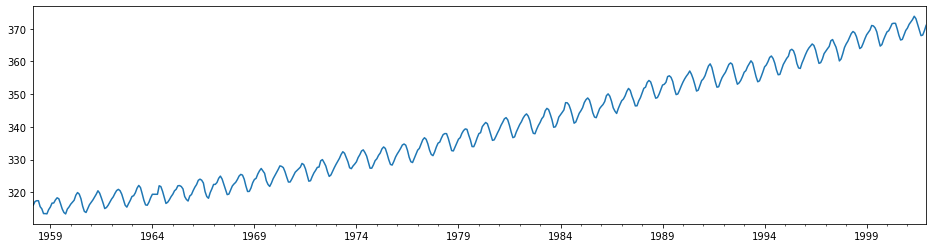

In [15]:
y.sort_index().plot(figsize=(16,4))

In [16]:
import itertools

# Define os parametros p, d e q como valores entre 0 e 2
p = d = q = range(0, 2)

# Gera as diferentes combinações
pdq = list(itertools.product(p, d, q))

# Gera as combinações para a sazonalidade (12 significa uma sazonalidade mensal)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Exemplos de Combinações para o SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Exemplos de Combinações para o SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Dúvida Edson

In [33]:
p = range(0, 2)
print(p)
print(list(p))

range(0, 2)
[0, 1]


In [34]:
p = d = q

In [35]:
print(list(d))
print(list(q))

[0, 1]
[0, 1]


Voltando ao exemplo

In [18]:
import warnings
warnings.filterwarnings("ignore") # ignorando os warnings

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:7612.550479816482
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:6787.291826170469
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1850.585061363545
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1574.3504839683774
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1048.5970798289045
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1048.1620796348716
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1337.6307479210686
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1030.368754984806
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:6881.020381118814
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:6072.599981103171
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1376.9720853484566
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1232.0424251182005
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:797.1980216531629
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:779.3280009996947
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1110.4848004936948
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:801.2102418715974
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1675.808692302429
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1222.3590884244354
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:623

A melhor combinação para o SARIMA foi os parâmetros (1, 1, 1) e parâmetros da sazonalidade como (1, 1, 1, 12) com um valor de AIC igual a algo em torno de 282

In [19]:
# Vamos agora ajustar o modelo SARIMA com os parâmetros acima (dar fit no modelo):

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit() # modelo treinado

In [23]:
# Calcula as predições a partir de 1998

pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False) # valor previsto
pred_ci = pred.conf_int()

In [26]:
pred #valor previsto

In [27]:
pred_ci # valor previsto com intervalo de confiança

,lower co2,upper co2
1998-01-01,364.442462,365.670861
1998-02-01,365.366448,366.594847
1998-03-01,366.396682,367.625082
1998-04-01,367.905909,369.134308
1998-05-01,368.391536,369.619935
1998-06-01,367.790137,369.018536
1998-07-01,366.471770,367.700168
1998-08-01,364.731084,365.959483
1998-09-01,363.176560,364.404959
1998-10-01,363.383430,364.611829


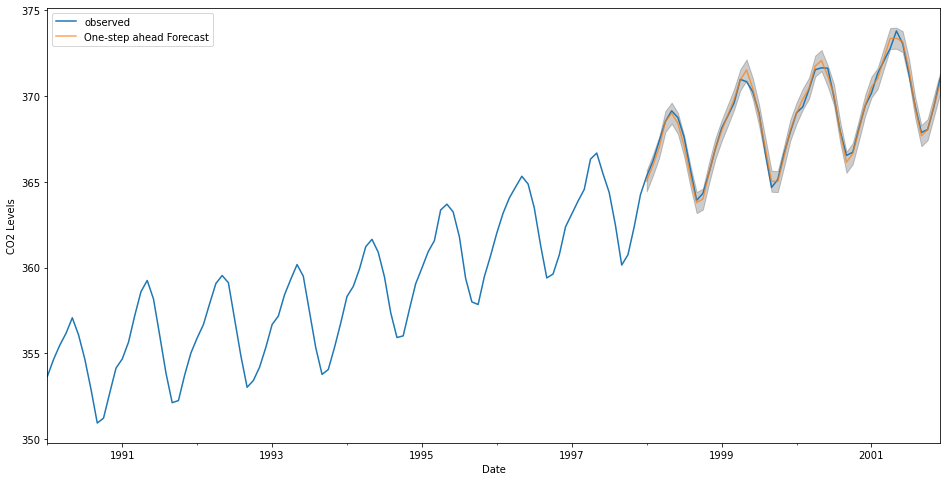

In [25]:
# Plot com o Forecasting

plt.figure(figsize=(16,8))

ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [28]:
# Vamos fazer 500 predições futuras
pred_uc = results.get_forecast(steps=500)

# Define o intervalo de confiança para o Forecasting
pred_ci = pred_uc.conf_int()

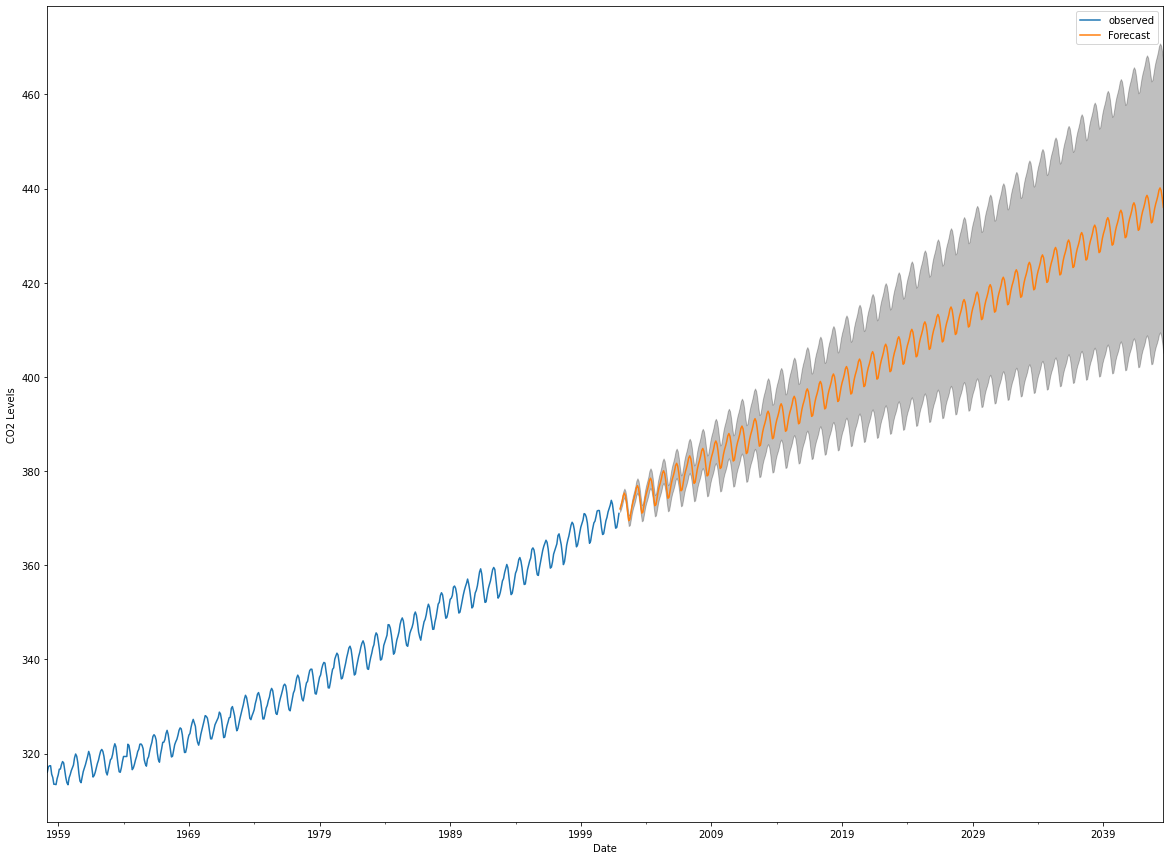

In [29]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

## Modelo de Regressão Linear

Agora sem usar nenhuma técnica específica para modelos de séries temporais, vamos utilizar uma regressão linear para tentar entender o comportamento dos nossos dados:

In [38]:
# import para o DataReader
from pandas_datareader.data import DataReader


symbol = 'DXCO3.SA'
df = DataReader(name = symbol,
                data_source = 'yahoo',
                start='2010-01-01',
                end='2018-12-31')

In [39]:
precos = df[df.index < '2021-01-01']['Adj Close']
precos

Date
2010-01-04     8.684584
2010-01-05     9.074214
2010-01-06     9.325420
2010-01-07     9.279278
2010-01-08     9.299785
                ...    
2018-12-20    10.907142
2018-12-21    10.552205
2018-12-26    10.782434
2018-12-27    11.127780
2018-12-28    11.348416
Name: Adj Close, Length: 2231, dtype: float64

<AxesSubplot:xlabel='Date'>

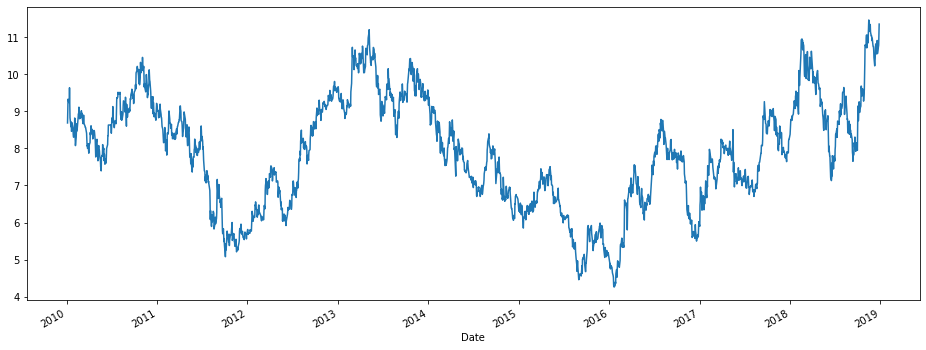

In [41]:
precos.plot(figsize=(16,6))

In [42]:
#Transforma em um DataFrame
df_precos = pd.DataFrame(precos)
df_precos.reset_index(inplace=True)
df_precos.head()

,Date,Adj Close
0,2010-01-04,8.684584
1,2010-01-05,9.074214
2,2010-01-06,9.325420
3,2010-01-07,9.279278
4,2010-01-08,9.299785


In [43]:
from datetime import datetime

# Cria o Date_Ref
df_precos['Date_Ref'] = df_precos['Date'].apply(lambda x: int(x.strftime('%Y%m%d')))
df_precos

,Date,Adj Close,Date_Ref
0,2010-01-04,8.684584,20100104
1,2010-01-05,9.074214,20100105
2,2010-01-06,9.325420,20100106
3,2010-01-07,9.279278,20100107
4,2010-01-08,9.299785,20100108
...,...,...,...
2226,2018-12-20,10.907142,20181220
2227,2018-12-21,10.552205,20181221
2228,2018-12-26,10.782434,20181226
2229,2018-12-27,11.127780,20181227


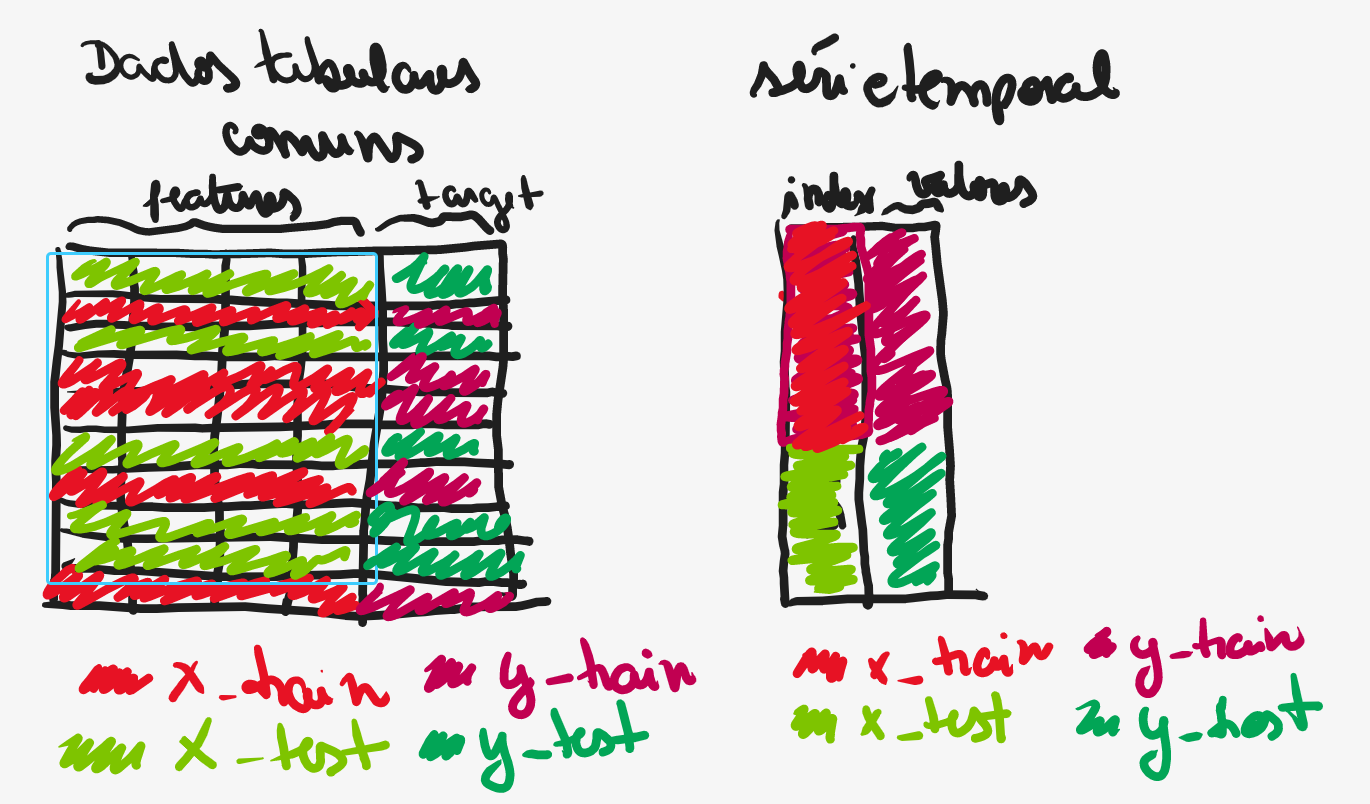

Vamos criar um loop onde definiremos uma uma janela __d__ de dias anteriores que iremos utilizar para treinar o modelo:

In [44]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

d = 30

list_date, list_y_test, list_y_pred = [], [], []

model = Lasso()

for i in range(d, df_precos.shape[0]):
    X_train = np.array(df_precos['Date_Ref'].iloc[i-d:i]).reshape(-1,1)
    y_train = np.array(df_precos['Adj Close'].iloc[i-d:i]).reshape(-1,1)
    X_test = np.array(df_precos['Date_Ref'].iloc[i]).reshape(1,-1)
    y_test = np.array(df_precos['Adj Close'].iloc[i]).reshape(1,-1)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    list_date.append(df_precos['Date'].iloc[i])
    list_y_test.append(float(y_test))
    list_y_pred.append(float(y_pred))
    
dict_output = {'Date': list_date,
               'y_test': list_y_test,
               'y_pred': list_y_pred}

dfLR = pd.DataFrame(dict_output)
dfLR.head()

,Date,y_test,y_pred
0,2010-02-18,8.920411,8.476372
1,2010-02-19,9.110098,8.514422
2,2010-02-22,8.797370,8.566197
3,2010-02-23,8.894779,8.594198
4,2010-02-24,8.921425,8.627344


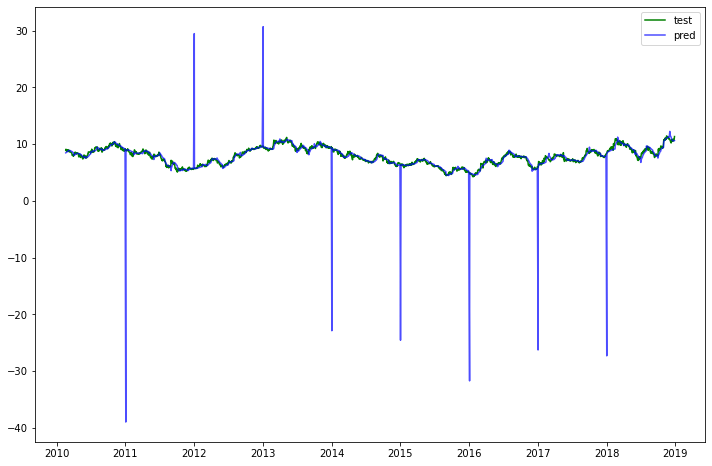

In [52]:
plt.figure(figsize=(12,8))

plt.plot(dfLR['Date'], dfLR['y_test'], color='green', label='test')

plt.plot(dfLR['Date'], dfLR['y_pred'], color='blue', label = 'pred', alpha=0.7)

plt.legend()
plt.show()

A predição parece que foi boa, apesar de alguns de alguns picos:

In [53]:
dfLR[(dfLR['y_pred'] > 20) | (dfLR['y_pred'] <-10)]

,Date,y_test,y_pred
217,2011-01-03,9.011368,-38.954383
466,2012-01-02,5.815001,29.489474
711,2013-01-02,9.660439,30.704336
959,2014-01-02,9.159547,-22.867178
1207,2015-01-02,6.304491,-24.541330
1453,2016-01-04,4.926936,-31.702091
1702,2017-01-02,5.900743,-26.258978
1956,2018-01-02,8.377044,-27.292736


Vamos corrigir esses valores com a média da predição anterior e posterior ao valor do pico:

In [54]:
list_corr = [217, 466, 711, 959, 1207, 1453, 1702, 1956]

for id_value in list_corr:
    dfLR['y_pred'].iloc[id_value] = (dfLR['y_pred'].iloc[id_value+1] + dfLR['y_pred'].iloc[id_value-1])/2

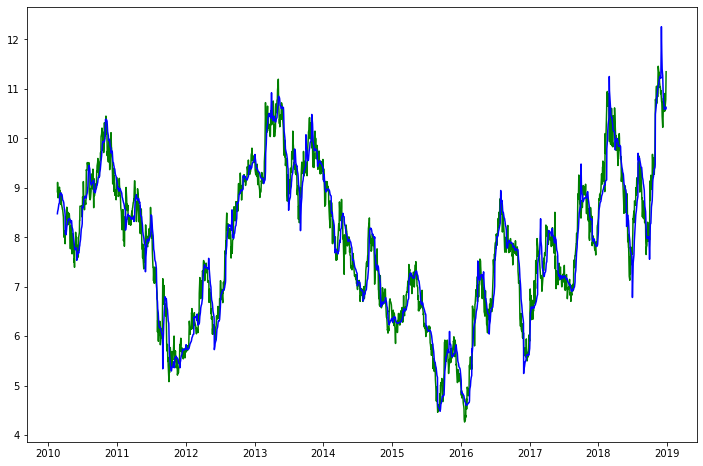

In [55]:
plt.figure(figsize=(12,8))

plt.plot(dfLR['Date'], dfLR['y_test'], color='green')

plt.plot(dfLR['Date'], dfLR['y_pred'], color='blue')
plt.show()